# Charge Line

We'll be creating a 2D design and adding a single transmon qcomponent with a charge line.

 Create a standard pocket transmon qubit with charge line for a ground plane,
        with two pads connected by a junction.

In [1]:
# So, let us dive right in. For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

In [3]:
# Each time you create a new quantum circuit design, 
# you start by instantiating a QDesign class. 

# The design class `DesignPlanar` is best for 2D circuit designs.

design = designs.DesignPlanar()

In [4]:
#Launch Qiskit Metal GUI to interactively view, edit, and simulate QDesign: Metal GUI
gui = MetalGUI(design)

In [5]:
# To force overwrite a QComponent with an existing name.  
# This is useful when re-running cells in a notebook. 
design.overwrite_enabled = True

### A transmon qubit with charge line.
You can create a ready-made transmon qubit from the QComponent Library, `qiskit_metal.qlibrary.qubits`. 
`transmon_pocket_cl.py` is the file containing our qubit so `transmon_pocket_cl` is the module we import. 
The `TransmonPocketCL` class is our transmon qubit. Like all quantum components, `TransmonPocketCL` inherits from `QComponent`. 

 Connector lines can be added using the `connection_pads` dictionary. 
 Each connector pad has a name and a list of default properties.
 
 A charge line can be added with options that start with "cl_" as shown in the next two cells.

In [6]:
from qiskit_metal.qlibrary.qubits.transmon_pocket_cl import TransmonPocketCL

# Be aware of the default_options that can be overridden by user.
TransmonPocketCL.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'chip': 'main',
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 'make_CL': True,
 'cl_gap': '6um',
 'cl_width': '10um',
 'cl_length': '20um',
 'cl_ground_gap': '6um',
 'cl_pocket_edge': '0',
 'cl_off_center': '50um',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'

In [7]:
transmon_options_cl = dict(
    pos_x = '1mm',
    pos_y = '2mm',
    orientation = '180',
    
    connection_pads=dict(
        a = dict(loc_W=+1, loc_H=-1, pad_width='70um', cpw_extend = '50um'), 
        b = dict(loc_W=-1, loc_H=-1, pad_width='125um', cpw_extend = '50um', pad_height='60um'),
        c = dict(loc_W=+1, loc_H=+1, pad_width='110um', cpw_extend = '50um')
    ),
    
    # What side of the pocket the charge line is.
    #      -180 to +180 from the 'west edge', will round to the nearest 90.
    cl_pocket_edge = '90',
    cl_off_center = '-40um',
    
    gds_cell_name='FakeJunction_01',
)

# Create a new Transmon Pocket object with name 'Q1' 
q1 = TransmonPocketCL(design, 'Q1', options=transmon_options_cl)

gui.rebuild()  # rebuild the design and plot 
gui.autoscale() # resize GUI to see QComponent 
gui.zoom_on_components(['Q1']) #Can also gui.zoom_on_components([q1.name]) 


Let's see what the Q1 object looks like

In [8]:
q1 #print Q1 information

name:    Q1
class:   TransmonPocketCL      
options: 
  'pos_x'             : '1mm',                        
  'pos_y'             : '2mm',                        
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '70um',                       
            'pad_height'        : '30um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '25um',                       
            'cpw_width'         : 'cpw_width',                  
            'cpw_gap'           : 'cpw_gap',                    
            'cpw_extend'        : '50um',                       
            'pocket_extent'     : '5um',                        
            'pocket_rise'       : '65um',                       
            'loc_W'             : 1,                            
            'loc_H'             : -1,                           

Save screenshot as a .png formatted file.

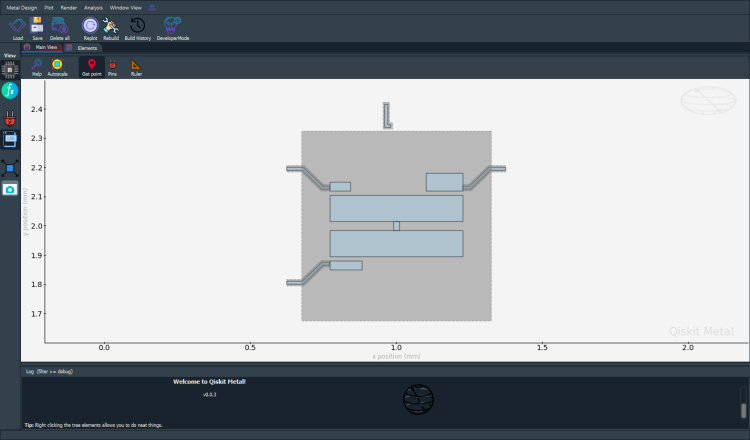

In [9]:
gui.screenshot()

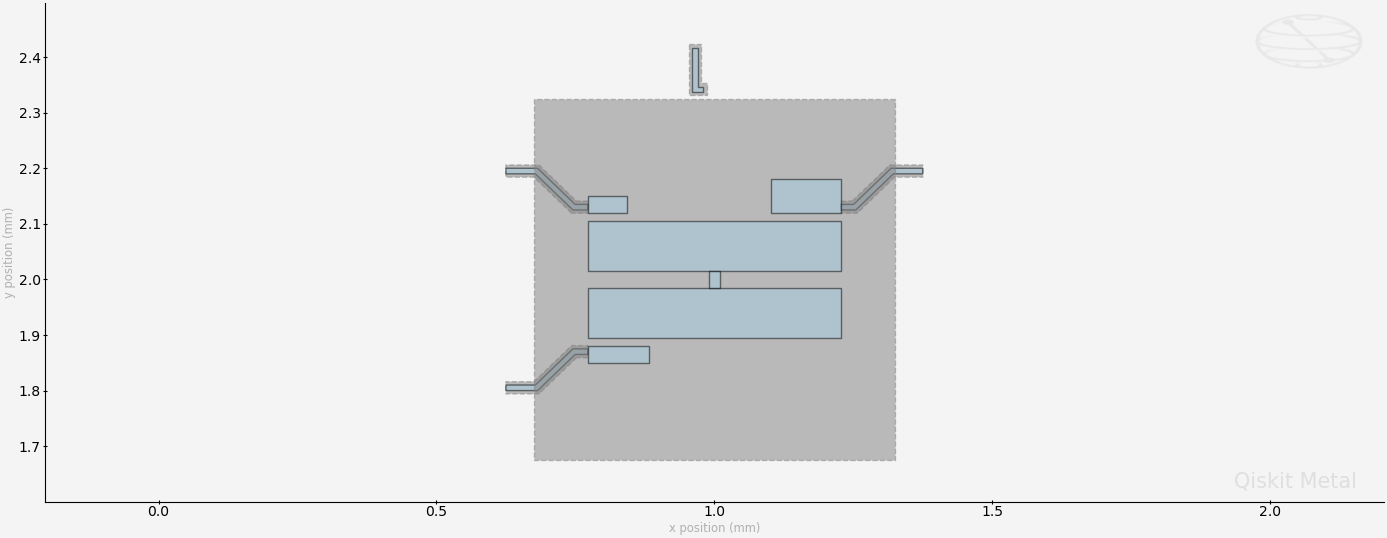

In [10]:
# Screenshot the canvas only as a .png formatted file.
gui.figure.savefig('shot.png')

from IPython.display import Image, display
_disp_ops = dict(width=500)
display(Image('shot.png', **_disp_ops))


## Closing the Qiskit Metal GUI

In [11]:
gui.main_window.close()

True